In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import os
save_path = "C:/Users/jing5/Documents/HW2"


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from torch.utils.data import Dataset,DataLoader

import torch.nn as nn
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

載入資料

In [354]:
train_data = pd.read_csv(r"C:\Users\jing5\Documents\HW2\TitanicData\train.csv")
test_data = pd.read_csv(r"C:\Users\jing5\Documents\HW2\TitanicData\test.csv")

print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

合併資料進行前處理

In [355]:
# 使用 pd.concat() 合併資料
total_data = pd.concat([train_data, test_data], ignore_index=True)

print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


PassengerId

In [356]:
# 查看 PassengerId 欄位的前 10 筆資料
print(train_data['PassengerId'].head(15))

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
Name: PassengerId, dtype: int64


Survived

[ 0.  1. nan]


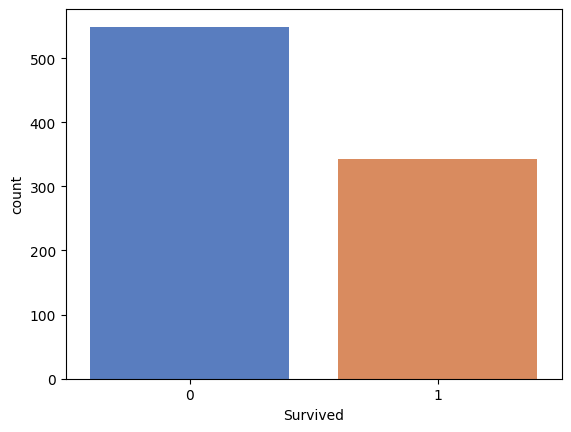

In [357]:
# 檢查 Survived 欄位的唯一值，包含 NaN
print(total_data['Survived'].unique())

# 繪製 Survived 欄位的分佈圖
sns.countplot(data=train_data, x='Survived',palette='muted')
plt.show()

Pclass

Pclass 唯一值: [3 1 2]


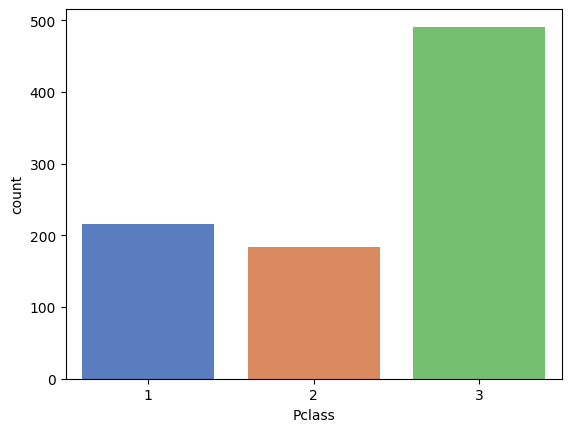

In [358]:
# 檢查 Pclass 欄位的唯一值
print("Pclass 唯一值:", total_data['Pclass'].unique())

# 繪製 Pclass 欄位的分佈圖
sns.countplot(train_data, x='Pclass',palette='muted')
plt.show()

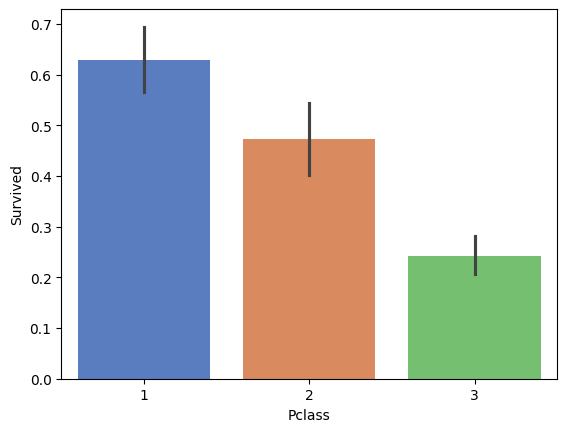

In [359]:
# 根據 Pclass 和 Survived 做可視化分析
sns.barplot(x='Pclass', y='Survived', data=train_data,palette='muted')
plt.show()

Sex

Sex 唯一值: ['male' 'female']


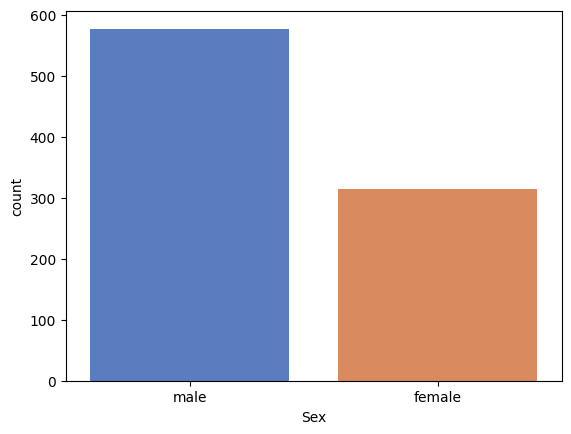

In [360]:
# 檢查 Sex 欄位的唯一值
print("Sex 唯一值:", total_data['Sex'].unique())

# 繪製 Sex 欄位的分佈圖
sns.countplot(data=train_data, x='Sex',palette='muted')
plt.show()

In [361]:
# 使用 LabelEncoder 將 Sex 欄位轉換為數值
labelencoder = LabelEncoder()
total_data['Sex'] = labelencoder.fit_transform(total_data['Sex'])

# 檢查轉換後的唯一值
print("轉換後的 Sex 唯一值:", total_data['Sex'].unique())

轉換後的 Sex 唯一值: [1 0]


Age

In [362]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB
None


In [363]:
# 使用 qcut 將 Age 欄位分為 8 組，儲存在 'Age_qcut'
train_data['Age_qcut'] = pd.qcut(train_data['Age'], 8)

# 查看 Age_qcut 的唯一值
print("Age_qcut 唯一值:", train_data['Age_qcut'].unique())

Age_qcut 唯一值: [(20.125, 24.0], (32.312, 38.0], (24.0, 28.0], NaN, (47.0, 80.0], (0.419, 16.0], (16.0, 20.125], (38.0, 47.0], (28.0, 32.312]]
Categories (8, interval[float64, right]): [(0.419, 16.0] < (16.0, 20.125] < (20.125, 24.0] < (24.0, 28.0] < (28.0, 32.312] < (32.312, 38.0] < (38.0, 47.0] < (47.0, 80.0]]


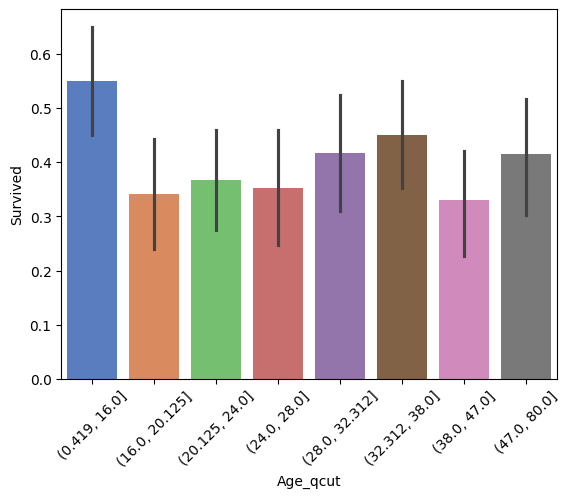

In [364]:
# Age_qcut 與 Survived 的條形圖
sns.barplot(x='Age_qcut', y='Survived', data=train_data, palette='muted')
plt.xticks(rotation=45)  # 旋轉 x 軸標籤，避免重疊
plt.show()

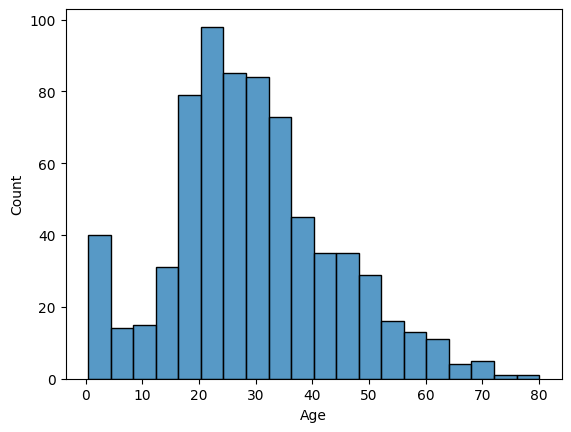

In [365]:
# 繪製 Age 欄位的直方圖
sns.histplot(train_data['Age'])
plt.show()

In [366]:
# 對 Age 欄位進行分類處理
total_data.loc[total_data['Age'] <= 16, 'Age'] = 1
total_data.loc[total_data['Age'] != 1, 'Age'] = 2

# 檢查 Age 欄位的唯一值
print(total_data['Age'].unique())

[2. 1.]


In [367]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB
None


SibSp

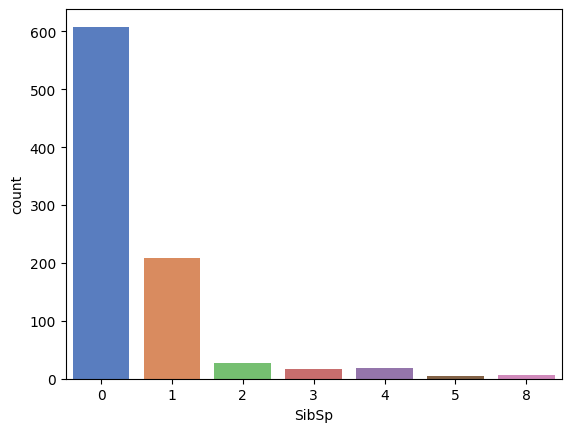

In [368]:
# 繪製 SibSp 欄位的分佈圖
sns.countplot(data=train_data, x='SibSp', palette='muted')
plt.show()

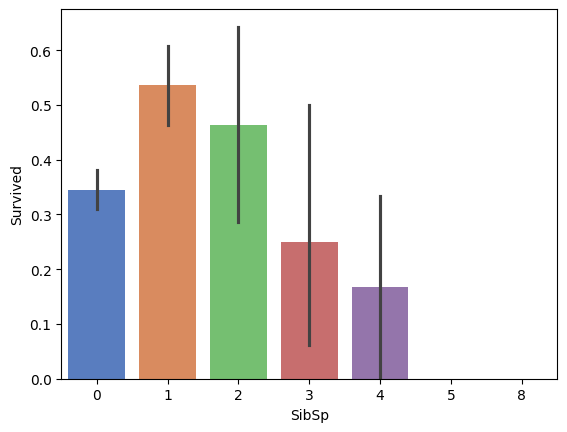

In [369]:
sns.barplot(x='SibSp', y='Survived', data=train_data, palette='muted')
plt.show()

In [370]:
# 將 SibSp 等於 1 或 2 的設為 1
total_data.loc[(total_data['SibSp'] == 1) | (total_data['SibSp'] == 2), 'SibSp'] = 1

# 將 SibSp 大於 2 的設為 2
total_data.loc[total_data['SibSp'] > 2, 'SibSp'] = 2

# 將 SibSp 等於 0 的設為 0
total_data.loc[total_data['SibSp'] < 1, 'SibSp'] = 0

# 檢視轉換後的值分佈
print(total_data['SibSp'].value_counts())

SibSp
0    891
1    361
2     57
Name: count, dtype: int64


In [371]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB
None


Parch

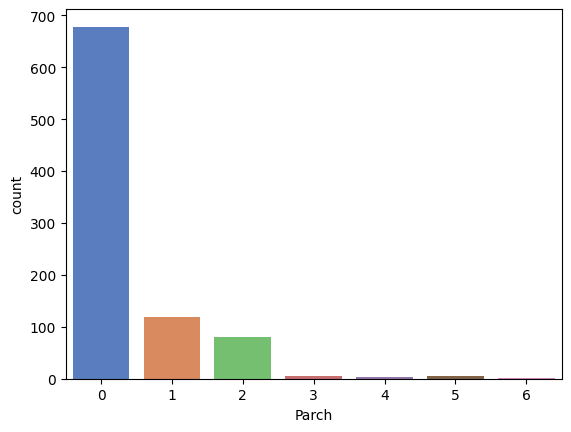

In [372]:
sns.countplot(data=train_data, x='Parch', palette='muted')
plt.show()

In [373]:
print(total_data['Parch'].value_counts())

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


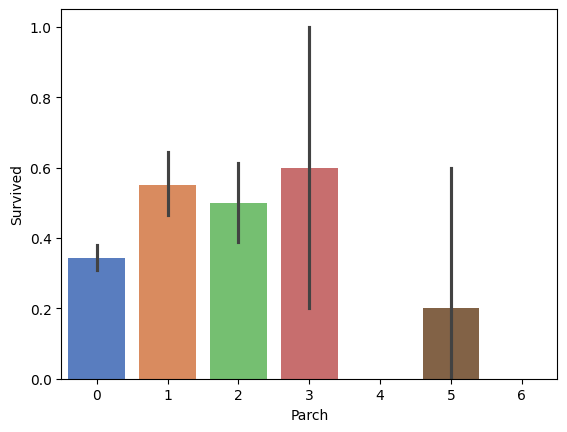

In [374]:
# 可視化 Parch 與 Survived 的關係，使用一致的 palette
sns.barplot(x='Parch', y='Survived', data=train_data, palette='muted')
plt.show()

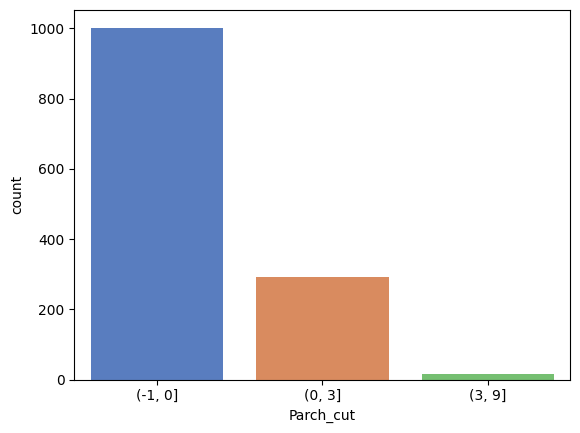

In [375]:
# 將 Parch 欄位重新分組
total_data['Parch_cut'] = pd.cut(total_data['Parch'], [-1, 0, 3, 9])

# 使用 Seaborn 繪製分組後的 Parch 欄位分佈
sns.countplot(x='Parch_cut', data=total_data, palette='muted')
plt.show()

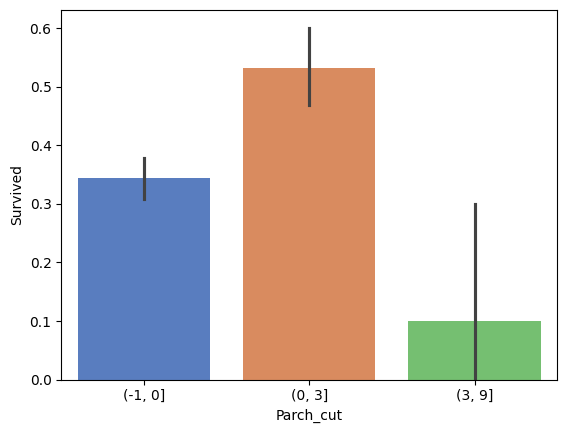

In [376]:
# 使用 seaborn 繪製分組後的 Parch_cut 與 Survived 的關係圖
sns.barplot(x='Parch_cut', y='Survived', data=total_data, palette='muted')

# 顯示圖表
plt.show()

In [377]:
# 根據觀察重新設置 Parch 的值
total_data.loc[(total_data['Parch'] > 0) & (total_data['Parch'] <= 3), 'Parch'] = 2
total_data.loc[total_data['Parch'] > 4, 'Parch'] = 4
total_data.loc[total_data['Parch'] <= 1, 'Parch'] = 1

# 查看修改後的分布
print(total_data['Parch'].value_counts())

Parch
1    1002
2     291
4      16
Name: count, dtype: int64


In [378]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  Parch_cut    1309 non-null   category
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 124.3+ KB
None


Fare

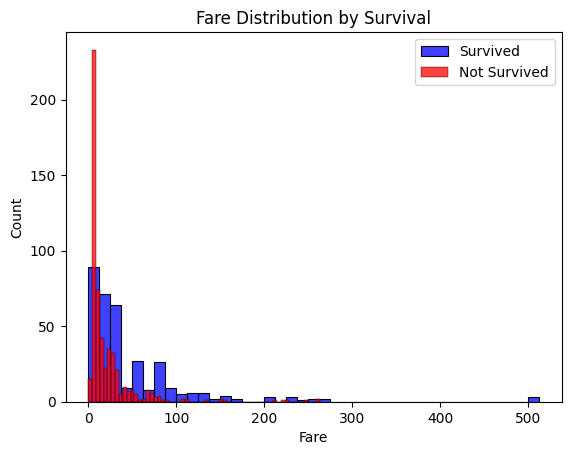

In [379]:
# 觀察票價 (Fare) 與生還 (Survived) 的關係
sns.histplot(
    train_data[train_data['Survived'] == 1]['Fare'], 
    color='blue', 
    label='Survived'
)

sns.histplot(
    train_data[train_data['Survived'] == 0]['Fare'], 
    color='red', 
    label='Not Survived'
)

# 加入圖例和標題
plt.legend()
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

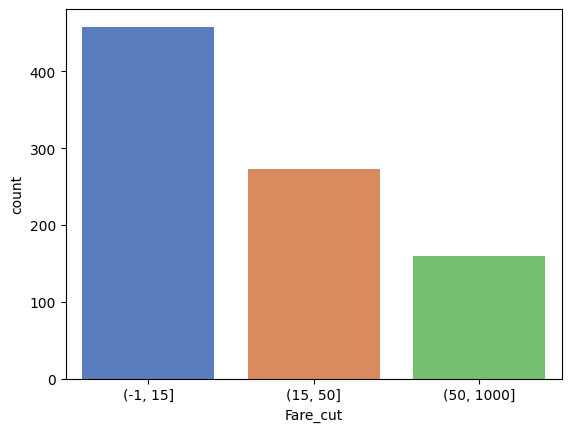

In [380]:
train_data['Fare_cut'] = pd.cut(train_data['Fare'], [-1, 15, 50, 1000])
sns.countplot(x=train_data['Fare_cut'], palette='muted')
plt.show()

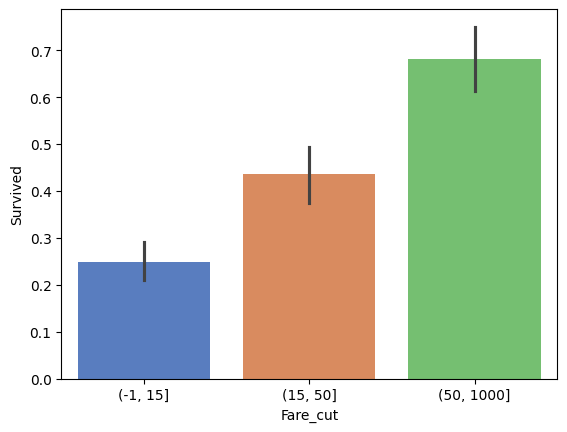

In [381]:
sns.barplot(x=train_data['Fare_cut'], y=train_data['Survived'], palette='muted')
plt.show()

In [382]:
# 將票價區間設置為特徵值
total_data.loc[total_data['Fare'] <= 15, 'Fare'] = 1
total_data.loc[(total_data['Fare'] > 15) & (total_data['Fare'] <= 50), 'Fare'] = 2
total_data.loc[total_data['Fare'] > 2, 'Fare'] = 3

# 查看修改後的 Fare 分佈
print(total_data['Fare'].value_counts())

Fare
1.0    673
2.0    395
3.0    240
Name: count, dtype: int64


In [383]:
# 補充缺失值
total_data['Fare'] = total_data['Fare'].fillna(1)

# 確認補充結果
print(total_data['Fare'].value_counts())

Fare
1.0    674
2.0    395
3.0    240
Name: count, dtype: int64


In [384]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  Parch_cut    1309 non-null   category
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 124.3+ KB
None


Embarked

Embarked 唯一值: ['S' 'C' 'Q' nan]
dtype: object


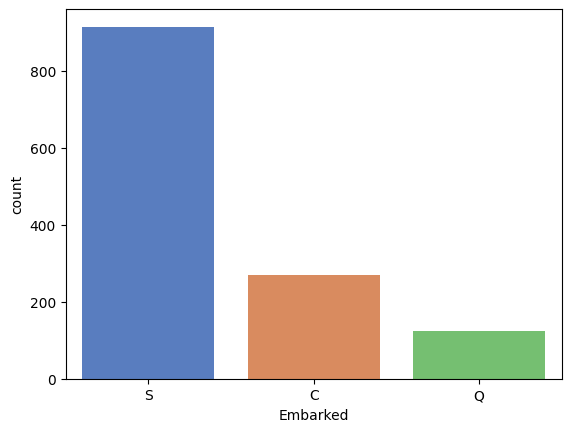

In [385]:
# 檢查 Embarked 欄位中的唯一值
print("Embarked 唯一值:", total_data['Embarked'].unique())
print("dtype:",total_data['Embarked'].dtype)

# 視覺化 Embarked 欄位的分布
sns.countplot(data=total_data, x='Embarked', palette='muted')
plt.show()

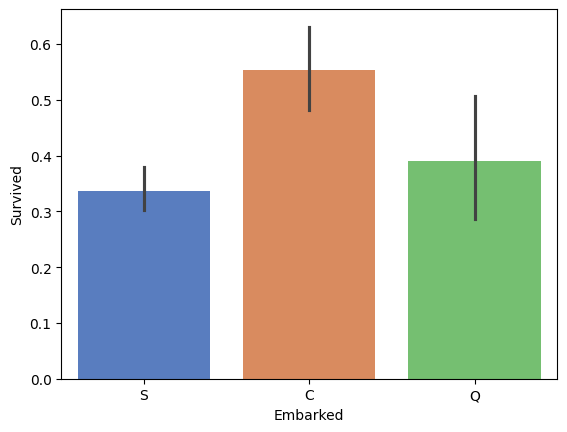

In [386]:
sns.barplot(x=train_data['Embarked'], y=train_data['Survived'], palette='muted')
plt.show()

In [387]:
total_data['Embarked'] = total_data['Embarked'].fillna('S')

# 確認 Embarked 欄位的唯一值
print("Embarked 唯一值:", total_data['Embarked'].unique())

Embarked 唯一值: ['S' 'C' 'Q']


In [388]:
# 使用 LabelEncoder 將 Embarked 欄位轉換為數值
labelencoder = LabelEncoder()
total_data['Embarked'] = labelencoder.fit_transform(total_data['Embarked'])

# 檢視 Embarked 欄位轉換後的分佈
print(total_data['Embarked'].value_counts())

Embarked
2    916
0    270
1    123
Name: count, dtype: int64


In [389]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1309 non-null   int64   
 12  Parch_cut    1309 non-null   category
dtypes: category(1), float64(3), int64(6), object(3)
memory usage: 124.3+ KB
None


將DataFram轉成ndarray

In [390]:
# 選擇特徵欄位並轉換為 NumPy 陣列
train_x = total_data.loc[total_data['Survived'].notnull(), ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].values
train_y = total_data.loc[total_data['Survived'].notnull(), 'Survived'].values
train_y = train_y.reshape(-1, 1)
test_x = total_data.loc[total_data['Survived'].isnull(), ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].values

# 檢查轉換後的 NumPy 陣列大小
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(891, 6)
(891, 1)
(418, 6)


In [391]:
# 初始化 MinMaxScaler 並進行正規化
minmax = MinMaxScaler()
train_x = minmax.fit_transform(train_x)
test_x = minmax.transform(test_x)

In [392]:
# 將資料轉為 Tensor 格式
train_x = torch.tensor(train_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
test_x = torch.tensor(test_x, dtype=torch.float32)

分成train_set、validate_set

In [393]:
# 將資料拆分為 8:2 的訓練與驗證集
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2)

# 檢查拆分後的資料形狀
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

torch.Size([712, 6])
torch.Size([179, 6])
torch.Size([712, 1])
torch.Size([179, 1])


Dataset

In [394]:
class dataset(Dataset):
    def __init__(self, x, y):
        self.x = x  # 儲存輸入特徵
        self.y = y  # 儲存標籤
        self.n_samples = len(x)  # 樣本數

    def __getitem__(self, index):
        # 回傳指定 index 的資料
        return self.x[index], self.y[index]

    def __len__(self):
        # 回傳資料集的總樣本數
        return self.n_samples

# 使用該類別建立 dataset 實例
train_set = dataset(train_x, train_y)

DataLoader

In [395]:
train_loader = DataLoader(dataset=train_set, batch_size=100, shuffle=True)

model

In [396]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# 定義模型架構
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(train_x.shape[1], 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

    def forward(self, x):
        return self.net(x)

# 初始化模型、損失函數和優化器
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# 訓練相關設定
epoch = 2000
n_batch = len(train_loader)
best_acc = 0

# 開始訓練模型
for i in range(epoch):
    model.train()
    for j, (samples, labels) in enumerate(train_loader):
        # 前向傳播
        pre = model(samples)
        loss = criterion(pre, labels)

        # 優化步驟
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"epoch {i+1}/{epoch}, batch {j+1}/{n_batch}, loss: {loss:.4f}", end='')

    # 評估訓練集準確率
    with torch.no_grad():
        model.eval()
        n_sample = train_x.shape[0]
        pre = model(train_x)
        pre = pre.round()
        n_correct = (pre == train_y).sum()
        train_acc = n_correct / n_sample
        print(f", train_acc: {train_acc:.4f}", end='')

    # 評估驗證集準確率
    with torch.no_grad():
        n_sample = valid_x.shape[0]
        pre = model(valid_x)
        pre = pre.round()
        n_correct = (pre == valid_y).sum()
        valid_acc = n_correct / n_sample
        print(f", valid_acc: {valid_acc:.4f}")

    # 儲存最佳模型
    if best_acc < valid_acc and abs(valid_acc - train_acc) < 0.01 and train_acc < 0.925:
        best_acc = valid_acc
        torch.save(model, os.path.join(save_path, "model.pth"))

print("訓練完成")



epoch 1/2000, batch 1/8, loss: 0.3942epoch 1/2000, batch 2/8, loss: 0.4160epoch 1/2000, batch 3/8, loss: 0.3871epoch 1/2000, batch 4/8, loss: 0.4305epoch 1/2000, batch 5/8, loss: 0.3253epoch 1/2000, batch 6/8, loss: 0.4090epoch 1/2000, batch 7/8, loss: 0.4352epoch 1/2000, batch 8/8, loss: 0.3407, train_acc: 0.6264, valid_acc: 0.5754
epoch 2/2000, batch 1/8, loss: 0.3467epoch 2/2000, batch 2/8, loss: 0.2654epoch 2/2000, batch 3/8, loss: 0.4759epoch 2/2000, batch 4/8, loss: 0.3849epoch 2/2000, batch 5/8, loss: 0.3645epoch 2/2000, batch 6/8, loss: 0.3975epoch 2/2000, batch 7/8, loss: 0.3458epoch 2/2000, batch 8/8, loss: 0.4767, train_acc: 0.6264, valid_acc: 0.5754
epoch 3/2000, batch 1/8, loss: 0.3615epoch 3/2000, batch 2/8, loss: 0.3761epoch 3/2000, batch 3/8, loss: 0.3467epoch 3/2000, batch 4/8, loss: 0.3345epoch 3/2000, batch 5/8, loss: 0.2856epoch 3/2000, batch 6/8, loss: 0.3740epoch 3/2000, batch 7/8, loss: 0.3501epoch 3/2000, batch 8/8, loss: 0.2893, train_acc: 0.6264, valid_acc: 0.

In [397]:
best_model = torch.load("C:/Users/jing5/Documents/HW2/model.pth")
print("Model loaded successfully!")

Model loaded successfully!


Confusion Matrix

In [398]:
with torch.no_grad():
    y_true = valid_y.numpy()  # 驗證集的真實標籤
    y_pred = best_model(valid_x).round().numpy()  # 驗證集的預測結果

    matrix = confusion_matrix(y_true, y_pred)  # 生成混淆矩陣
    print("Confusion Matrix:")
    print(matrix)


Confusion Matrix:
[[94  9]
 [22 54]]


Accuracy

In [399]:
with torch.no_grad():
    n_sample = valid_x.shape[0]  # 驗證集的樣本數量
    pre = best_model(valid_x)  # 預測結果
    pre = pre.round()  # 四捨五入，將預測值轉為 0 或 1
    n_correct = (pre == valid_y).sum()  # 計算正確預測的數量
    acc = n_correct / n_sample  # 計算準確率
    print(f'valid_acc={acc:.4f}')


valid_acc=0.8268


In [400]:
with torch.no_grad():
    n_sample = train_x.shape[0]  # 訓練集的樣本數量
    pre = best_model(train_x)  # 預測結果
    pre = pre.round()  # 四捨五入，將預測值轉為 0 或 1
    n_correct = (pre == train_y).sum()  # 計算正確預測的數量
    acc = n_correct / n_sample  # 計算準確率
    print(f'train_acc={acc:.4f}')


train_acc=0.8315


In [ ]:
with torch.no_grad():
    n_sample = test_x.shape[0]  # 使用測試資料
    pre = best_model_pre_cabin(test_x)  # 使用已保存的模型進行預測
    pre = pre.round()  # 將結果四捨五入為 0 或 1
    pre = pre.view(-1).numpy().astype(int)  # 調整形狀並轉換為整數

    # 建立 DataFrame 並存為 CSV
    answer = pd.DataFrame({
        'PassengerId': test_data['PassengerId'], 
        'Survived': pre
    })

    answer.to_csv("C:/Users/jing5/Documents/HW2/IT_submission.csv", index=False)  # 存成 CSV
